In [1]:
#Import Required Libraries
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
#load Churn dataset
churn = pd.read_csv('churn_clean.csv')

In [3]:
#Check for Missing Data
churn.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [4]:
# Summary Statistics - Continuous
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#Summary Statistics - Categorical


churn[['Techie','TechSupport','Contract','Gender']].describe()

,Techie,TechSupport,Contract,Gender
count,10000,10000,10000,10000
unique,2,2,3,3
top,No,No,Month-to-month,Female
freq,8321,6250,5456,5025


<AxesSubplot:>

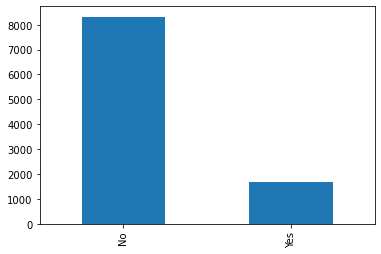

In [6]:
#Categorical Variables - Univariate
#Techie
churn['Techie'].value_counts().plot.bar()


<AxesSubplot:>

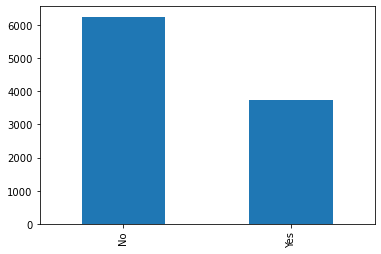

In [7]:
#Categorical Variables - Univariate
#TechSupport
churn['TechSupport'].value_counts().plot.bar()


<AxesSubplot:>

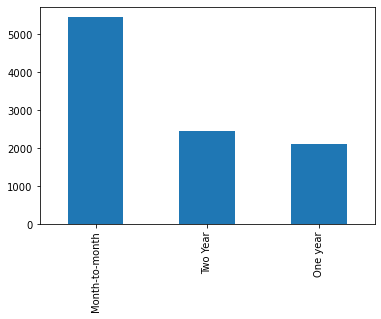

In [8]:
#Categorical Variables - Univariate
#Contract
churn['Contract'].value_counts().plot.bar()

<AxesSubplot:>

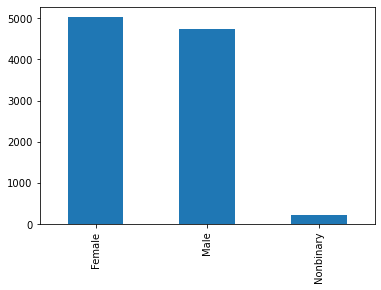

In [9]:
#Categorical Variables - Univariate
#Gender
churn['Gender'].value_counts().plot.bar()

array([[<AxesSubplot:title={'center':'Children'}>]], dtype=object)

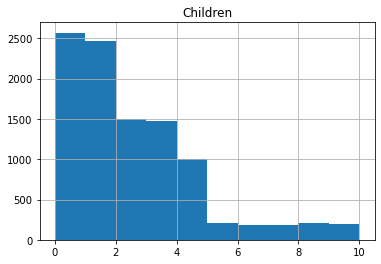

In [10]:
#Continuous Variables - Univariate
#Children
churn.hist(column='Children')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

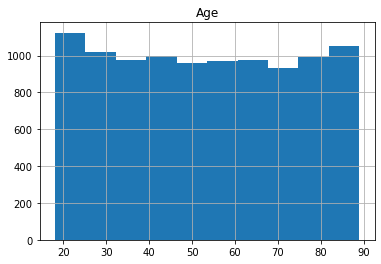

In [11]:
#Continuous Variables - Univariate
#Age
churn.hist(column='Age')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

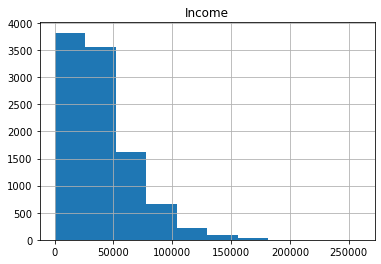

In [12]:
#Continuous Variables - Univariate
#Income
churn.hist(column='Income')

array([[<AxesSubplot:title={'center':'Contacts'}>]], dtype=object)

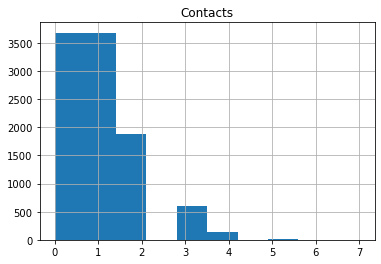

In [13]:
#Continuous Variables - Univariate
#Contacts
churn.hist(column='Contacts')

array([[<AxesSubplot:title={'center':'Yearly_equip_failure'}>]],
      dtype=object)

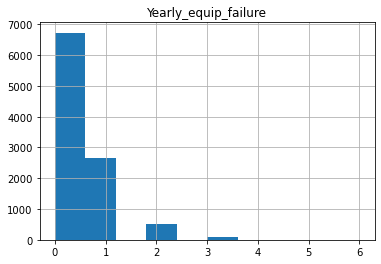

In [14]:
#Continuous Variables - Univariate
#Yearly_equip_failure
churn.hist(column='Yearly_equip_failure')

array([[<AxesSubplot:title={'center':'Tenure'}>]], dtype=object)

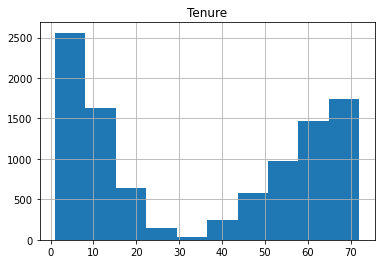

In [15]:
#Continuous Variables - Univariate
#Tenure
churn.hist(column='Tenure')

array([[<AxesSubplot:title={'center':'MonthlyCharge'}>]], dtype=object)

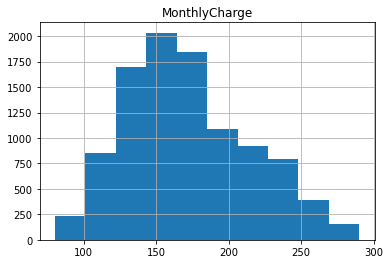

In [16]:
#Continuous Variables - Univariate
#MonthlyCharge
churn.hist(column='MonthlyCharge')

array([[<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>]], dtype=object)

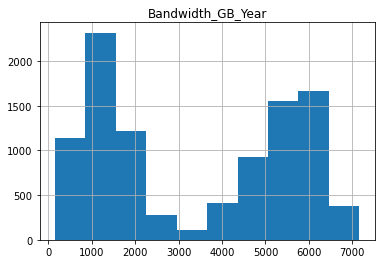

In [17]:
#Continuous Variables - Univariate
#Bandwidth_GB_Year
churn.hist(column='Bandwidth_GB_Year')

<AxesSubplot:xlabel='Gender'>

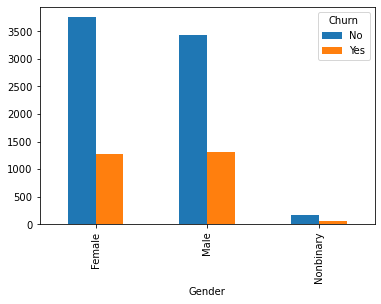

In [18]:
#Categorical Variables - Bivariate
#Gender - Churn
pd.crosstab(churn.Gender,churn.Churn).plot(kind = 'bar')

<AxesSubplot:xlabel='Contract'>

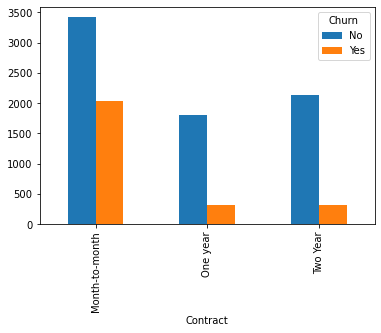

In [19]:
#Categorical Variables - Bivariate
#Contract - Churn
pd.crosstab(churn.Contract,churn.Churn).plot(kind = 'bar')

<AxesSubplot:xlabel='TechSupport'>

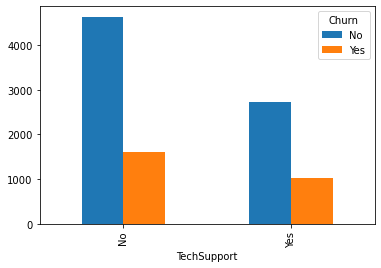

In [20]:
#Categorical Variables - Bivariate
#TechSupport - Churn
pd.crosstab(churn.TechSupport,churn.Churn).plot(kind = 'bar')

<AxesSubplot:xlabel='Techie'>

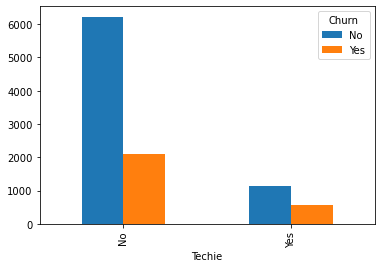

In [21]:
#Categorical Variables - Bivariate
#Techie Churn
pd.crosstab(churn.Techie,churn.Churn).plot(kind = 'bar')

In [22]:
#Dummy Variables of Categorical Variables
ServicesPrefix = ['Gender','Churn','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','Port_modem','Tablet','InternetService','Phone','StreamingTV','StreamingMovies','PaperlessBilling','Contract','TechSupport','Techie','PaymentMethod']
#Remove 1 dummy each for each column to prevent Dummy Trap
Churndummies = pd.get_dummies(churn[ServicesPrefix], prefix = ServicesPrefix)
DummyChurn= pd.concat([churn,Churndummies], axis = 'columns')
ChurnFinal = DummyChurn.drop(['Gender','Gender_Nonbinary','Churn','Churn_No','Multiple','Multiple_No','OnlineSecurity','OnlineSecurity_No','OnlineBackup','OnlineBackup_No','DeviceProtection','DeviceProtection_No','Port_modem','Port_modem_No','Tablet','Tablet_No','InternetService','InternetService_None','Phone','Phone_No','StreamingTV','StreamingTV_No','StreamingMovies','StreamingMovies_No','PaperlessBilling','PaperlessBilling_No','Contract','Contract_Month-to-month','TechSupport','TechSupport_No','Techie','Techie_No','Port_modem','PaymentMethod','PaymentMethod_Mailed Check'],axis = 'columns')
ChurnFinal


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Contract_One year,Contract_Two Year,TechSupport_Yes,Techie_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,0,1,1,1,0,0,0,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,1,1,1,0,0,0,1,1,0,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,0,1,1,0,1,0,1,0,1,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,1,0,1,0,1,0,1,0,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,0,0,0,0,0,0,0,0,0,1
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,1,0,0,0,1,0,0,0,0,1
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,0,0,1,0,0,0,0,1,0,0
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,1,1,1,0,1,1,0,0,1,0


In [23]:
ChurnFinal.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'Gender_Female', 'Gender_Male', 'Churn_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic', 'Phone_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'Contract_One year', 'Contract_Two Year', 'TechSupport_Yes',
       'Techie_Yes', 'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check'],
      dtype='object')

In [24]:
ChurnFinal = ChurnFinal.loc[:,'Children':'PaymentMethod_Electronic Check']

In [25]:
ChurnFinal.rename(columns={'Contract_One year':'Contract_OneYear','Contract_Two Year':'Contract_TwoYear','PaymentMethod_Bank Transfer(automatic)':'PaymentMethod_BankTransfer(automatic)','PaymentMethod_Credit Card (automatic)':'PaymentMethod_CreditCard(automatic)','PaymentMethod_Electronic Check':'PaymentMethod_ElectronicCheck'}, inplace=True)


In [26]:
#Extract ChurnFinal dataframe to CSV
ChurnFinal.to_csv('CleanChurnFinal.csv')

# Initial Model

In [27]:
initialmodel = logit("Churn_Yes ~ Children + Age + Income + Contacts + Yearly_equip_failure + Tenure + MonthlyCharge + Bandwidth_GB_Year + Item1 + Item2 + Item3 + Item4 + Item5 + Item6 + Item7 + Item8 + Gender_Female + Gender_Male + Contract_OneYear + Contract_TwoYear + TechSupport_Yes + Techie_Yes", data=ChurnFinal).fit()

# Print the parameters of the fitted model
print(initialmodel.summary())
#Confusion Matrix
conf_matrix = initialmodel.pred_table()

print("Initial Confusion Matrix")
print(conf_matrix)

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
Accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy", Accuracy)

# Calculate and print the sensitivity
Sensitivity = TP / (TP + FN)
print("Sensitivity", Sensitivity)

# Calculate and print the specificity
Specificity = TN / (TN + FP)
print("Specificity", Specificity)

Optimization terminated successfully.
         Current function value: 0.235288
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.5931
Time:                        18:40:58   Log-Likelihood:                -2352.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.6910      0.466    -14.366      0.000      -7.604      -5.778

# Reduced Model

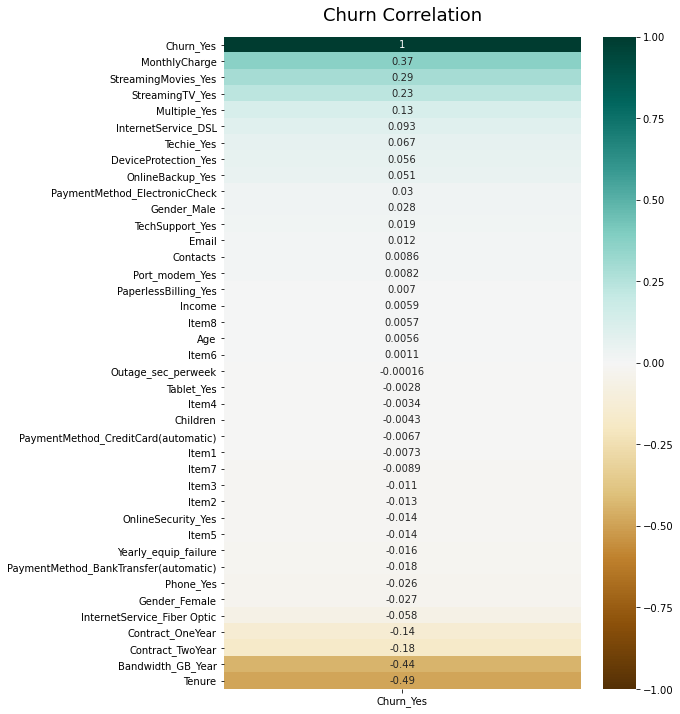

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ChurnFinal.corr()[['Churn_Yes']].sort_values(by='Churn_Yes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Churn Correlation', fontdict={'fontsize':18}, pad=16);

In [29]:
reducedmodel = logit("Churn_Yes ~ Contract_OneYear + Contract_TwoYear + Bandwidth_GB_Year + Tenure + MonthlyCharge + StreamingMovies_Yes + StreamingTV_Yes + Multiple_Yes" , data=ChurnFinal).fit()

# Print the parameters of the fitted model
print(reducedmodel.summary())
#Confusion Matrix
conf_matrix = reducedmodel.pred_table()
print("Reduced Confusion Matrix")
print(conf_matrix)
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
Accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy", Accuracy)

# Calculate and print the sensitivity
Sensitivity = TP / (TP + FN)
print("Sensitivity", Sensitivity)

# Calculate and print the specificity
Specificity = TN / (TN + FP)
print("Specificity", Specificity)

Optimization terminated successfully.
         Current function value: 0.232688
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.5976
Time:                        18:42:20   Log-Likelihood:                -2326.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.9627      0.223    -17.752      0.000      -4.400      -3.525
Co